### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
┌ Info: The General registry is installed via git. Consider reinstalling it via
│ the newer faster direct from tarball format by running:
│   pkg> registry rm General; registry add General
│ 
└ @ Pkg.Registry C:\Users\domin\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\Pkg\src\Registry\Registry.jl:478
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`
   Installed Static ─────────────────── v1.3.0
   Installed SciMLPublic ────────────── v1.0.0
   Installed SIMD ───────────────────── v3.7.2
   Installed LoggingExtras ──────────── v1.2.0
   Installed Libmount_jll ───────────── v2.41.2+0
   Installed HTTP ───────────────────── v1.10.19
   Installed FileIO ─────────────────── v1.17.1
   Installed DataFrames ─────────────── v1.8.1
   Installed 

In [2]:
using Dragoon

In [45]:
D1 = [6.89,7.55,7.55]*1e-3  # 18.5
D2 = [5.63,6.18,6.18]*1e-3  # 21.0
D3 = [4.71,5.01,5.01]*1e-3  # 23.5

p1 = dist2pos(D1)
p2 = dist2pos(D2)
p3 = dist2pos(D3)

dp = sum(p1-p3)

0.014159999999999994

In [81]:
dp = 0.7e-3

0.0007

In [82]:
(dp/10e-6)/60

1.1666666666666667

In [83]:
(dp/2e-6)/60

5.833333333333333

In [54]:

# initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(18.5e9,1500e6; n=50) # optimize on these frequencies
freqsplot = genFreqs(18.5e9,2000e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(p1; ϵ=9.0,tand=0*1e-4)  # physical properties of the booster

ref0 = getRef1d(booster,freqs)
Obj = ObjRef1dSquare(ref0)
hist = initHist(booster,10000,freqs,Obj); # stores measurements
#                           ^ length, should be at least n

10000-element Vector{State}:
 State([0.006889999999999999, 0.015439999999999999, 0.023989999999999997], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 ⋮
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0], 0.0, Date

In [47]:
pos2dist(booster.pos)/1e-3

3-element Vector{Float64}:
 6.89
 7.549999999999998
 7.549999999999998

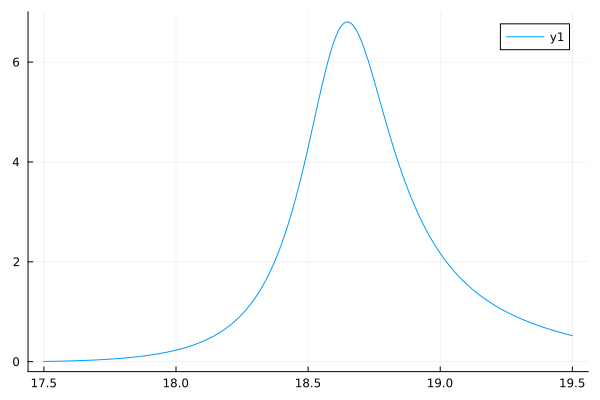

In [55]:
plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

In [ ]:
n = 3 # number of discs in the booster

initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(22.025e9,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster


hist = initHist(booster,10000,freqs,ObjRef1dTest()); # stores measurements
#                           ^ length, should be at least n

### Optimizer

In [ ]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-9,
                    ObjRef1dTest(),
                    InitSimplexCoord(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e3),
                    showtrace=true,
                    showevery=100,
                    unstuckisiter=true);

In [76]:
D = []

for i in 1:1000
    n = booster.ndisk
    booster.pos = copy(p1)
    move(booster,rande(n)*0.1e-3/2; additive=true)
    booster.summeddistance = 0

    trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-9,1e-9,
                    Obj,
                    InitSimplexCoord(1e-6),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e3),
                    showtrace=false,
                    unstuckisiter=true);

    # println(booster.summeddistance)
    push!(D,booster.summeddistance)
end

In [78]:
dp = sum(D)/length(D)

0.0010249828403501881

In [ ]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

In [ ]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")